In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [15]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:49,  2.40it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 1 of 100
Generator loss: 1.37771797, Discriminator loss: 0.92331344


118it [00:39,  2.99it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 2 of 100
Generator loss: 3.46770382, Discriminator loss: 1.17012000


118it [00:44,  2.68it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 3 of 100
Generator loss: 5.95977306, Discriminator loss: 0.18521743


118it [00:44,  2.68it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 4 of 100
Generator loss: 7.67206669, Discriminator loss: 0.17163290


118it [00:42,  2.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


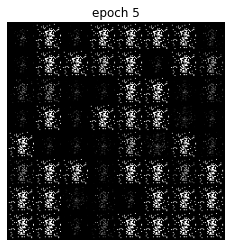

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 5 of 100
Generator loss: 9.19454765, Discriminator loss: 0.13864619


118it [00:46,  2.54it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 6 of 100
Generator loss: 8.09939671, Discriminator loss: 0.61274797


118it [00:40,  2.93it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 7 of 100
Generator loss: 6.61325216, Discriminator loss: 0.53614563


118it [00:39,  2.99it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 8 of 100
Generator loss: 6.96168327, Discriminator loss: 0.51921529


118it [00:50,  2.35it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 9 of 100
Generator loss: 4.53090286, Discriminator loss: 0.54051971


118it [00:42,  2.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


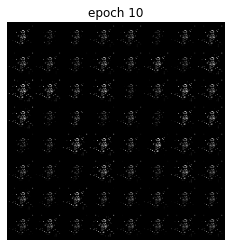

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 10 of 100
Generator loss: 5.43396044, Discriminator loss: 0.52449846


118it [00:40,  2.94it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 11 of 100
Generator loss: 3.81722856, Discriminator loss: 0.77857113


118it [00:39,  2.98it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 12 of 100
Generator loss: 4.91425228, Discriminator loss: 0.75168031


118it [00:49,  2.36it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 13 of 100
Generator loss: 2.45990872, Discriminator loss: 0.82319218


118it [00:42,  2.79it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 14 of 100
Generator loss: 2.23873734, Discriminator loss: 1.01831377


118it [00:40,  2.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


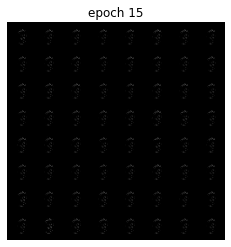

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 15 of 100
Generator loss: 2.18555045, Discriminator loss: 0.66103059


118it [00:44,  2.65it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 16 of 100
Generator loss: 1.46468461, Discriminator loss: 0.95797050


118it [00:53,  2.20it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 17 of 100
Generator loss: 3.31027126, Discriminator loss: 0.76847607


118it [00:45,  2.58it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 18 of 100
Generator loss: 2.22623682, Discriminator loss: 0.87063092


118it [00:38,  3.07it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 19 of 100
Generator loss: 2.02293444, Discriminator loss: 0.83233017


118it [00:41,  2.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


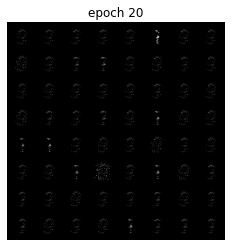

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 20 of 100
Generator loss: 2.66053796, Discriminator loss: 0.52109849


118it [00:42,  2.78it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 21 of 100
Generator loss: 4.07694674, Discriminator loss: 0.37023607


118it [00:36,  3.20it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 22 of 100
Generator loss: 4.35787916, Discriminator loss: 0.31454393


118it [00:37,  3.18it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 23 of 100
Generator loss: 5.01862669, Discriminator loss: 0.29859099


118it [00:37,  3.16it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 24 of 100
Generator loss: 5.05903912, Discriminator loss: 0.40821549


118it [00:36,  3.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


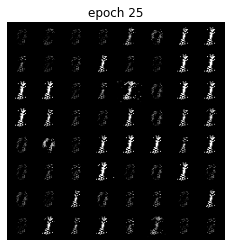

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 25 of 100
Generator loss: 4.33312321, Discriminator loss: 0.40843165


118it [00:43,  2.71it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 26 of 100
Generator loss: 4.80521059, Discriminator loss: 0.30413657


118it [00:43,  2.69it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 27 of 100
Generator loss: 4.39386702, Discriminator loss: 0.38926688


118it [00:46,  2.52it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 28 of 100
Generator loss: 3.91193390, Discriminator loss: 0.48968148


118it [00:45,  2.58it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 29 of 100
Generator loss: 3.58069587, Discriminator loss: 0.46824059


118it [00:44,  2.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


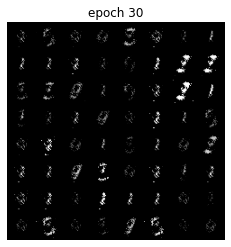

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 30 of 100
Generator loss: 3.75056863, Discriminator loss: 0.39005363


118it [00:42,  2.78it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 31 of 100
Generator loss: 3.99884129, Discriminator loss: 0.43833077


118it [00:38,  3.06it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 32 of 100
Generator loss: 3.74694204, Discriminator loss: 0.42391646


118it [00:39,  2.95it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 33 of 100
Generator loss: 4.16954660, Discriminator loss: 0.32180592


118it [00:43,  2.74it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 34 of 100
Generator loss: 4.15043545, Discriminator loss: 0.40258375


118it [00:37,  3.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


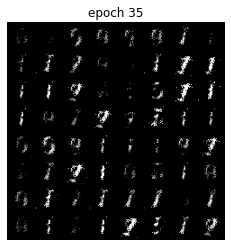

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 35 of 100
Generator loss: 3.90185261, Discriminator loss: 0.42969090


118it [00:38,  3.05it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 36 of 100
Generator loss: 3.64089704, Discriminator loss: 0.37864909


118it [00:44,  2.68it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 37 of 100
Generator loss: 3.94264650, Discriminator loss: 0.32830665


118it [00:37,  3.19it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 38 of 100
Generator loss: 3.96198606, Discriminator loss: 0.31078959


118it [00:39,  2.96it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 39 of 100
Generator loss: 4.66951036, Discriminator loss: 0.28804788


118it [00:48,  2.43it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


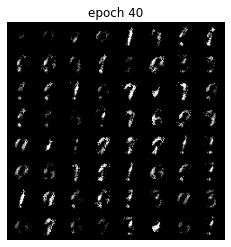

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 40 of 100
Generator loss: 4.06770706, Discriminator loss: 0.43892795


118it [00:43,  2.72it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 41 of 100
Generator loss: 3.74509978, Discriminator loss: 0.41868317


118it [00:40,  2.94it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 42 of 100
Generator loss: 3.94449639, Discriminator loss: 0.38155714


118it [00:40,  2.90it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 43 of 100
Generator loss: 3.77225828, Discriminator loss: 0.40970603


118it [00:45,  2.61it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 44 of 100
Generator loss: 3.92473531, Discriminator loss: 0.36284217


118it [00:39,  3.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


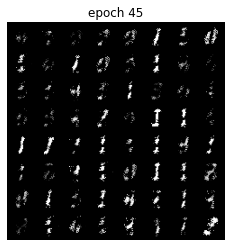

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 45 of 100
Generator loss: 3.89068341, Discriminator loss: 0.39470053


118it [00:46,  2.53it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 46 of 100
Generator loss: 3.62965560, Discriminator loss: 0.37346023


118it [00:40,  2.88it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 47 of 100
Generator loss: 3.53614998, Discriminator loss: 0.44146299


118it [00:39,  3.02it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 48 of 100
Generator loss: 3.65142870, Discriminator loss: 0.43327156


118it [00:37,  3.16it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 49 of 100
Generator loss: 3.29678512, Discriminator loss: 0.42302415


118it [00:41,  2.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


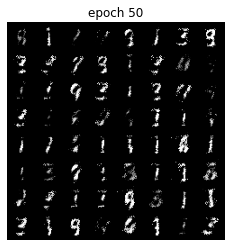

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 50 of 100
Generator loss: 3.42033696, Discriminator loss: 0.48071489


118it [00:43,  2.72it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 51 of 100
Generator loss: 3.37193632, Discriminator loss: 0.44005555


118it [00:39,  2.99it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 52 of 100
Generator loss: 3.30618954, Discriminator loss: 0.45716617


118it [00:38,  3.03it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 53 of 100
Generator loss: 3.17451286, Discriminator loss: 0.44689748


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 54 of 100
Generator loss: 3.17014980, Discriminator loss: 0.47773081


118it [00:41,  2.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


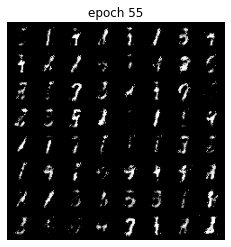

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 55 of 100
Generator loss: 3.08708954, Discriminator loss: 0.49353582


118it [00:39,  2.97it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 56 of 100
Generator loss: 2.99494004, Discriminator loss: 0.50258088


118it [00:43,  2.69it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 57 of 100
Generator loss: 2.83407235, Discriminator loss: 0.54735285


118it [00:49,  2.37it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 58 of 100
Generator loss: 2.86280656, Discriminator loss: 0.53514338


118it [00:42,  2.80it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 59 of 100
Generator loss: 3.01680613, Discriminator loss: 0.50554723


118it [00:40,  2.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


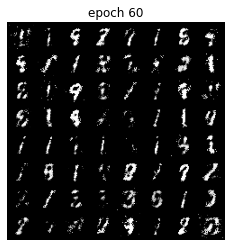

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 60 of 100
Generator loss: 2.93424916, Discriminator loss: 0.53541052


118it [00:50,  2.36it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 61 of 100
Generator loss: 3.08698583, Discriminator loss: 0.52026480


118it [00:46,  2.55it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 62 of 100
Generator loss: 2.96664262, Discriminator loss: 0.55564713


118it [00:39,  2.96it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 63 of 100
Generator loss: 2.80979776, Discriminator loss: 0.54755545


118it [00:36,  3.19it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 64 of 100
Generator loss: 2.96752906, Discriminator loss: 0.51274371


118it [00:39,  2.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


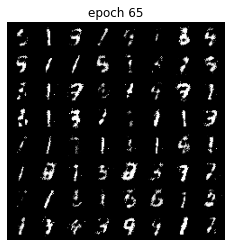

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 65 of 100
Generator loss: 2.90424919, Discriminator loss: 0.52689946


118it [00:38,  3.05it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 66 of 100
Generator loss: 2.87019157, Discriminator loss: 0.54534596


118it [00:36,  3.19it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 67 of 100
Generator loss: 2.77028918, Discriminator loss: 0.53836679


118it [00:37,  3.15it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 68 of 100
Generator loss: 2.67181087, Discriminator loss: 0.57395589


118it [00:40,  2.90it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 69 of 100
Generator loss: 2.75278592, Discriminator loss: 0.59470010


118it [00:38,  3.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


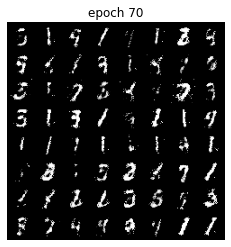

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 70 of 100
Generator loss: 2.72149611, Discriminator loss: 0.58267766


118it [00:50,  2.31it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 71 of 100
Generator loss: 2.78026199, Discriminator loss: 0.54794866


118it [00:49,  2.38it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 72 of 100
Generator loss: 2.73263335, Discriminator loss: 0.55000514


118it [00:43,  2.71it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 73 of 100
Generator loss: 2.62419534, Discriminator loss: 0.56946719


118it [00:41,  2.84it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 74 of 100
Generator loss: 2.58320403, Discriminator loss: 0.59650129


118it [00:46,  2.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


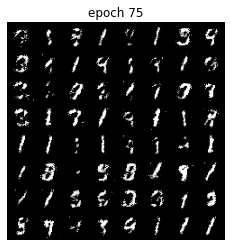

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 75 of 100
Generator loss: 2.70066071, Discriminator loss: 0.61633211


118it [00:36,  3.19it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 76 of 100
Generator loss: 2.60955381, Discriminator loss: 0.61366707


118it [00:36,  3.23it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 77 of 100
Generator loss: 2.67041802, Discriminator loss: 0.57028693


118it [00:37,  3.18it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 78 of 100
Generator loss: 2.64106083, Discriminator loss: 0.60202485


118it [00:37,  3.12it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 79 of 100
Generator loss: 2.44778109, Discriminator loss: 0.63433951


118it [00:36,  3.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


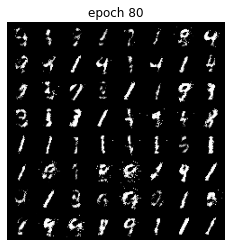

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 80 of 100
Generator loss: 2.45498729, Discriminator loss: 0.65314054


118it [00:36,  3.24it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 81 of 100
Generator loss: 2.47820330, Discriminator loss: 0.62733889


118it [00:37,  3.17it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 82 of 100
Generator loss: 2.47789955, Discriminator loss: 0.61625594


118it [00:35,  3.29it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 83 of 100
Generator loss: 2.39175510, Discriminator loss: 0.64383537


118it [00:36,  3.21it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 84 of 100
Generator loss: 2.34326291, Discriminator loss: 0.64996344


118it [00:36,  3.22it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


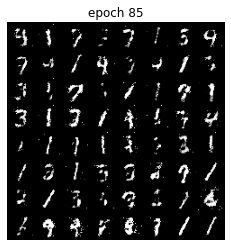

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 85 of 100
Generator loss: 2.27687740, Discriminator loss: 0.66212851


118it [00:36,  3.23it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 86 of 100
Generator loss: 2.19547129, Discriminator loss: 0.69199508


118it [00:39,  3.02it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 87 of 100
Generator loss: 2.34767461, Discriminator loss: 0.65678906


118it [00:46,  2.55it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 88 of 100
Generator loss: 2.35632038, Discriminator loss: 0.65516394


118it [00:43,  2.71it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 89 of 100
Generator loss: 2.44902349, Discriminator loss: 0.66251051


118it [00:41,  2.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


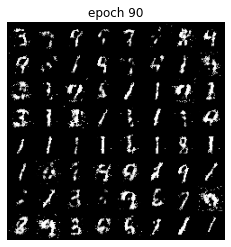

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 90 of 100
Generator loss: 2.36730194, Discriminator loss: 0.65795869


118it [00:44,  2.66it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 91 of 100
Generator loss: 2.29902864, Discriminator loss: 0.67559338


118it [00:45,  2.61it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 92 of 100
Generator loss: 2.29981041, Discriminator loss: 0.68887448


118it [00:41,  2.87it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 93 of 100
Generator loss: 2.24331164, Discriminator loss: 0.66645551


118it [00:38,  3.07it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 94 of 100
Generator loss: 2.18083262, Discriminator loss: 0.71080709


118it [00:41,  2.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


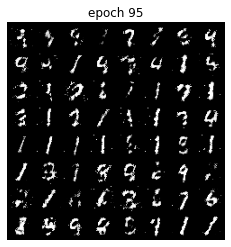

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 95 of 100
Generator loss: 2.21210766, Discriminator loss: 0.70501161


118it [00:40,  2.93it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 96 of 100
Generator loss: 2.26207566, Discriminator loss: 0.69716012


118it [00:39,  3.02it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 97 of 100
Generator loss: 2.25122142, Discriminator loss: 0.71058643


118it [00:39,  3.02it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 98 of 100
Generator loss: 2.22913361, Discriminator loss: 0.71969950


118it [00:39,  3.02it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 99 of 100
Generator loss: 2.19990993, Discriminator loss: 0.74212557


118it [00:35,  3.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


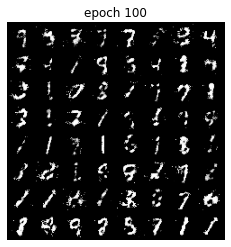

Epoch 100 of 100
Generator loss: 1.96005881, Discriminator loss: 0.78296858


In [16]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
    
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [17]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [18]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

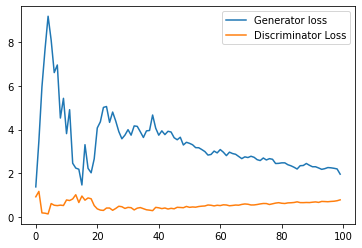

In [19]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')